<a href="https://colab.research.google.com/github/Rytis-J/Dexcom-Follow/blob/main/01_neural_network_regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [60]:
X = tf.range(-100, 100,4)
y = X+10

40


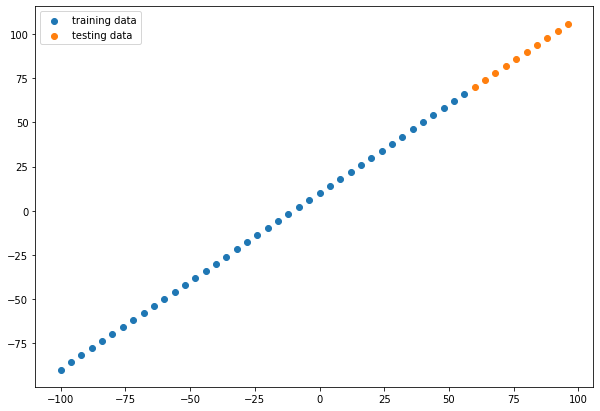

In [234]:
len = int(tf.reduce_prod(tf.shape(X))/100*80)
print(len)
X_train = X[:len]
y_train = y[:len]

X_test = X[len:]
y_test= y[len:]

plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, label="training data")
plt.scatter(X_test, y_test, label="testing data")

plt.legend();
predictions_list = []

In [244]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["mae"]
)



In [245]:
 model.fit(X_train, y_train, epochs=200, verbose=0)

In [246]:
y_pred = model.predict(X_test)
predictions_list.append(y_pred)

1/1 [==============================] - 0s 60ms/step


tf.Tensor([60 64 68 72 76 80 84 88 92 96], shape=(10,), dtype=int32)
[[ 71.10304 ]
 [ 75.16438 ]
 [ 79.22571 ]
 [ 83.28703 ]
 [ 87.34836 ]
 [ 91.4097  ]
 [ 95.47102 ]
 [ 99.532364]
 [103.59369 ]
 [107.655014]]


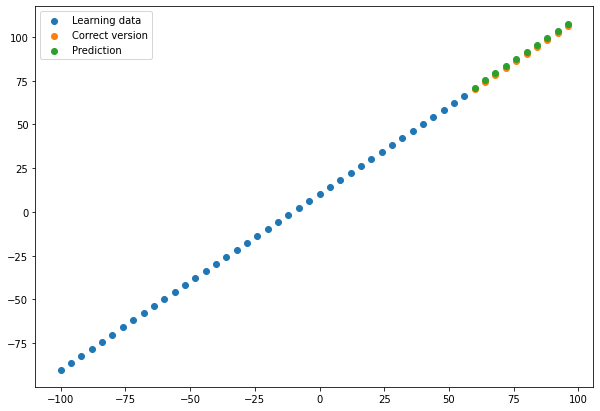

In [247]:
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, label="Learning data")
plt.scatter(X_test, y_test, label="Correct version")
plt.scatter(X_test, y_pred, label="Prediction")

plt.legend()

print(X_test)
print(y_pred)


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([31.752863, 28.126286, 24.49971 , 20.873138, 17.397247, 14.571993,
       12.397364, 10.946734, 10.148053, 10.      ], dtype=float32)>

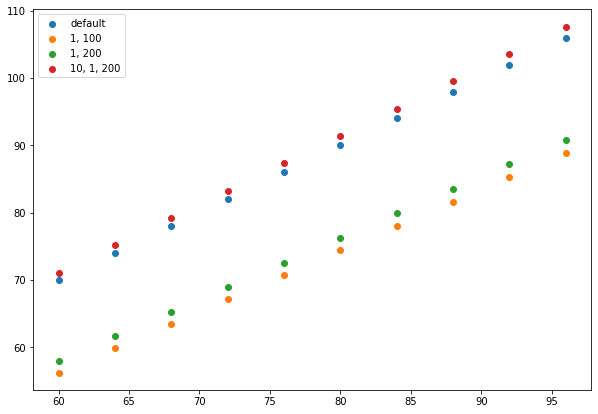

In [259]:
plt.figure(figsize=(10,7))
plt.scatter(X_test, y_test, label="default")
plt.scatter(X_test, predictions_list[0], label="1, 100")
plt.scatter(X_test, predictions_list[1], label="1, 200")
plt.scatter(X_test, predictions_list[2], label="10, 1, 200")
plt.legend()




In [279]:
tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(tf.constant(predictions_list[2])))

<tf.Tensor: shape=(), dtype=float32, numpy=1.3790314>

In [292]:
import pandas as pd

a = tf.keras.metrics.mse(y_test, tf.squeeze(tf.constant(predictions_list[0])))
a2 = tf.keras.metrics.mae(y_test, tf.squeeze(tf.constant(predictions_list[0])))
b = tf.keras.metrics.mse(y_test, tf.squeeze(tf.constant(predictions_list[1])))
c = tf.keras.metrics.mse(y_test, tf.squeeze(tf.constant(predictions_list[2])))

model_results=[
    ["model_1", a.numpy()],
    ["model_2", b.numpy()],
    ["model_3", c.numpy()],
]

all_results = pd.DataFrame(model_results, columns=["model", "mse"])
all_results

,model,mse
0,model_1,239.336380
1,model_2,185.524857
2,model_3,1.932759
